In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving pricerunner_aggregate.csv to pricerunner_aggregate.csv


In [3]:
df = pd.read_csv("pricerunner_aggregate.csv",encoding='utf-8', header=None)

In [4]:
df.head()
# word cloud to be checked
# word to vector 



,0,1,2,3,4,5,6
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [5]:
df.columns = ['ID', 'Title', 'VendorID', 'ClusterID', 'ClusterLabel', 'CategoryID', 'CategoryLabel']

In [6]:
df.isnull().sum()

ID               0
Title            0
VendorID         0
ClusterID        0
ClusterLabel     0
CategoryID       0
CategoryLabel    0
dtype: int64

In [7]:
df.head()

,ID,Title,VendorID,ClusterID,ClusterLabel,CategoryID,CategoryLabel
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             35311 non-null  int64 
 1   Title          35311 non-null  object
 2   VendorID       35311 non-null  int64 
 3   ClusterID      35311 non-null  int64 
 4   ClusterLabel   35311 non-null  object
 5   CategoryID     35311 non-null  int64 
 6   CategoryLabel  35311 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.9+ MB


In [10]:
df.ClusterLabel.unique()

array(['Apple iPhone 8 Plus 64GB', 'Apple iPhone 7 Plus 32GB',
       'Apple iPhone 7 32GB', ..., 'Smeg FAB28 Pink', 'Candy CRU16.0',
       'Neff K4316'], dtype=object)

In [12]:
df.ClusterLabel.value_counts()

Canon IXUS 185              27
Canon PowerShot SX730 HS    24
Samsung UE49NU7100          24
Apple iPhone 8 Plus 64GB    23
Samsung UE65NU7100          23
                            ..
Panasonic TX-65FX600B        1
Samsung HG55ED890WB          1
Samsung UE55MU6192           1
Panasonic TX-24D302B         1
Neff K4316                   1
Name: ClusterLabel, Length: 12849, dtype: int64

In [13]:
df.CategoryID.value_counts()

2622    5501
2612    4081
2620    4044
2615    3862
2623    3584
2614    3564
2619    3424
2617    2697
2618    2342
2621    2212
Name: CategoryID, dtype: int64

In [14]:
df.VendorID.value_counts()

3      2547
6      1591
298    1523
31     1350
119    1239
       ... 
37        1
200       1
296       1
127       1
371       1
Name: VendorID, Length: 306, dtype: int64

In [16]:
cat_atr = ["Title","ClusterLabel","CategoryLabel"]
num_atr = ["VendorID","ClusterID","CategoryID"]

In [17]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df[num_atr] = ss.fit_transform(df[num_atr])

In [18]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

df[cat_atr] = df[cat_atr].apply(le.fit_transform)

In [19]:
# K-Means Clustering
from sklearn.cluster import KMeans

nclusters = 7 # this is the k in kmeans
seed = 0

X = df.drop(columns="ID")

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([2, 2, 2, ..., 4, 5, 6], dtype=int32)

In [20]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.5156717754120841

In [34]:
y = X['ClusterID']

In [35]:
contingency_matrix1 = metrics.cluster.contingency_matrix(y,y_cluster_kmeans)
contingency_matrix1

array([[ 0,  2, 19, ...,  0,  0,  0],
       [ 0,  2, 17, ...,  0,  0,  0],
       [ 0,  1, 17, ...,  0,  1,  0],
       ...,
       [ 0,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  0,  1,  0],
       [ 0,  0,  0, ...,  0,  0,  1]])

In [36]:
np.amax(contingency_matrix1, axis=0)

array([ 8, 21, 19, 14, 17, 27, 17])

In [37]:
y = np.sum(contingency_matrix1)  #total sum of all elements in contingency matrix
y

35311

In [38]:
x = np.sum(np.amax(contingency_matrix1, axis=0)) #Sum of max. elements from each row
x

123

In [39]:
purity = float(x)/float(y) 
purity

0.003483333805329784

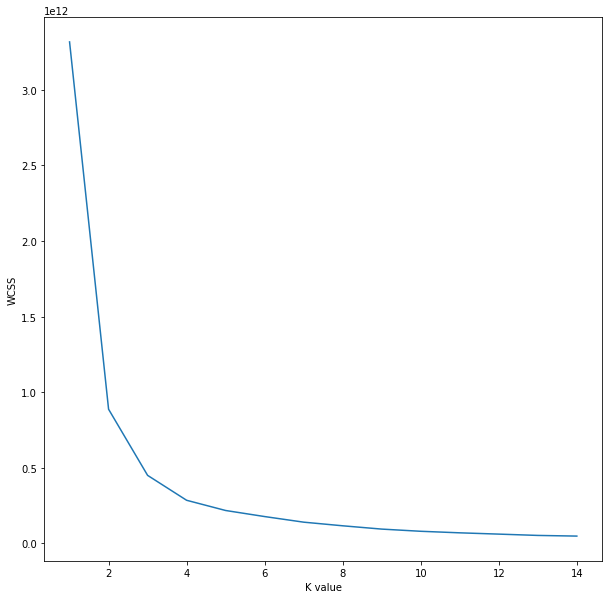

In [40]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(X)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

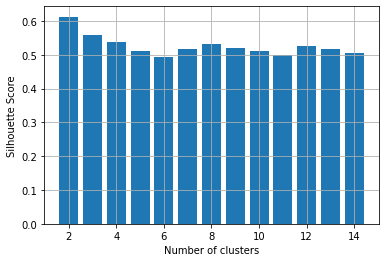

In [41]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2,15):
    silhouette_scores.append( 
        silhouette_score(X, KMeans(n_clusters = n_cluster).fit_predict(X))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 

Agglomerative Clustering

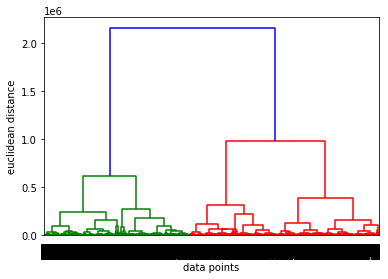

In [43]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(X, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [44]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(X)
X["label"] = cluster